<a href="https://colab.research.google.com/github/kausar-vento/PCVK_Genap_2023/blob/main/Minggu%2011/Week11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
import matplotlib.pyplot as plt
from PIL import ImageDraw
from PIL import Image

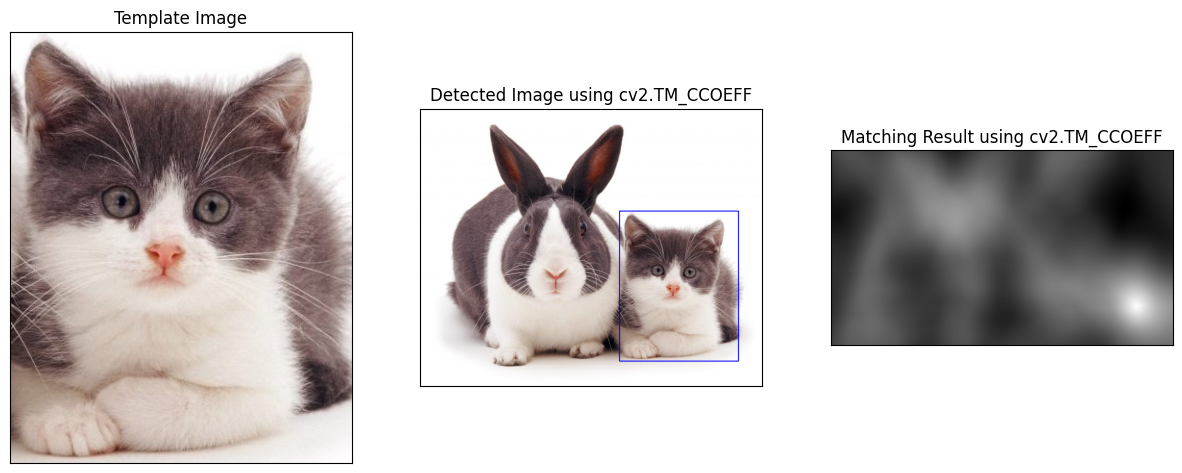

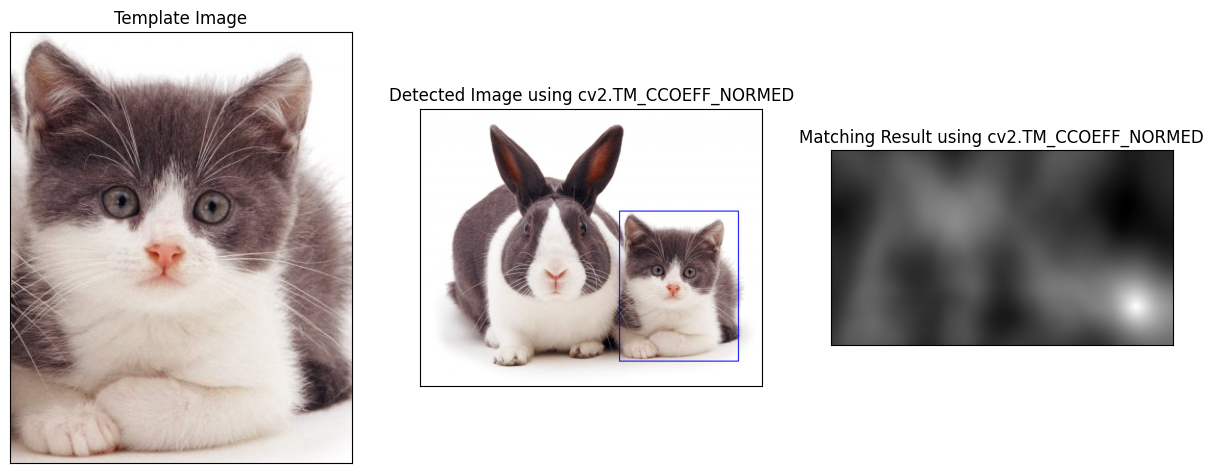

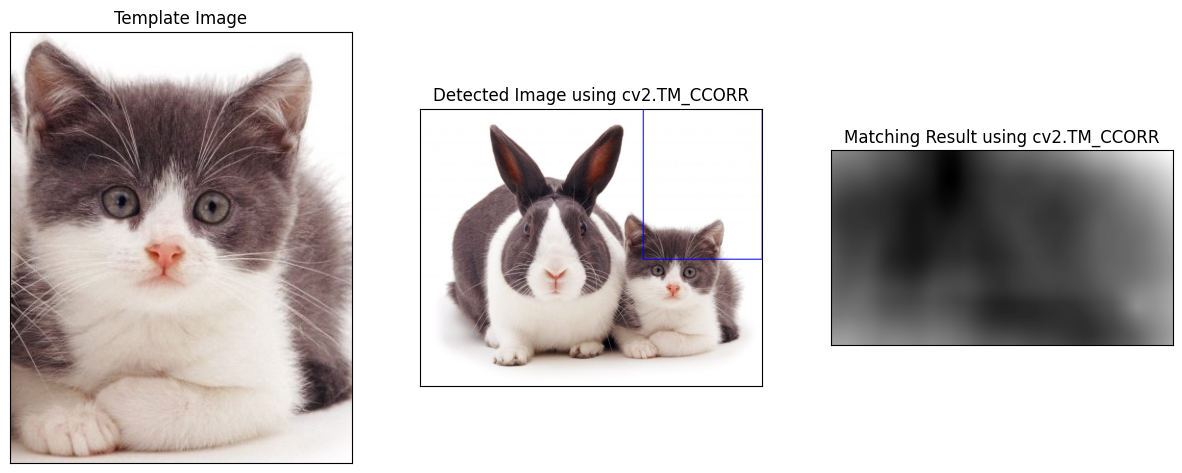

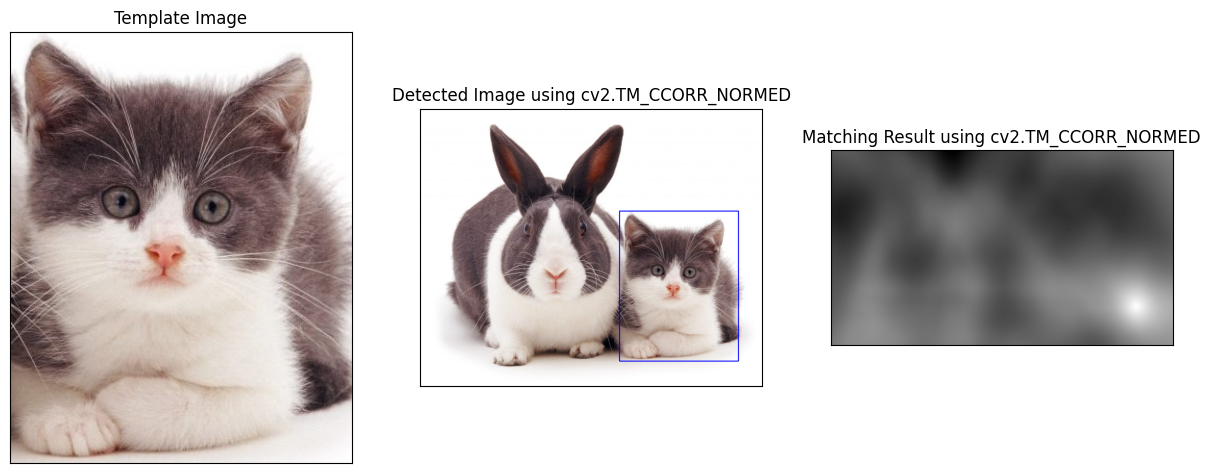

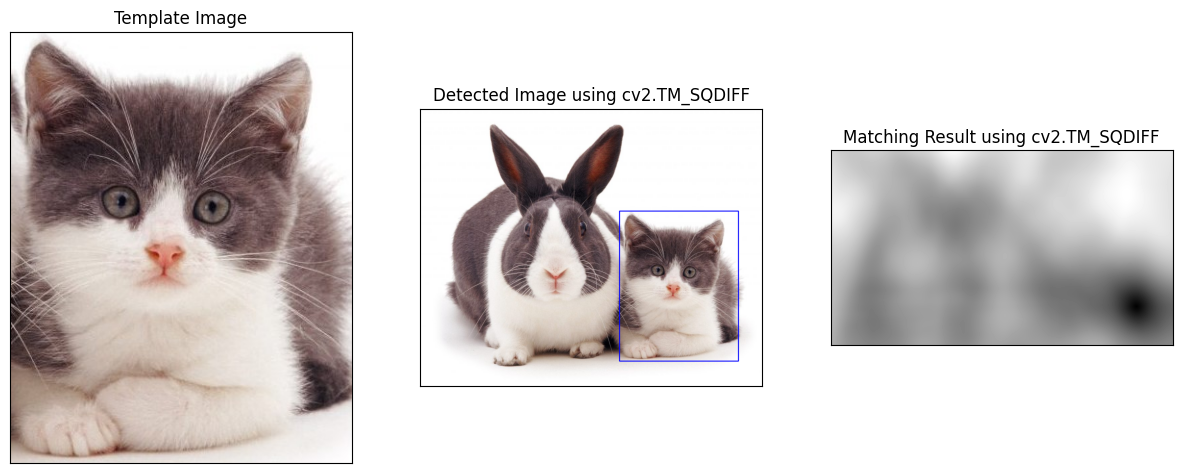

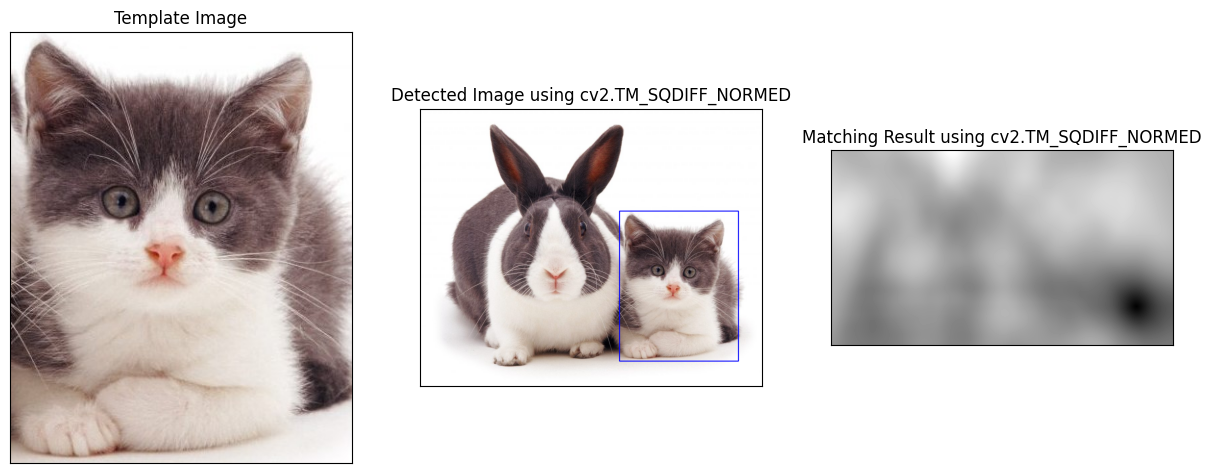

In [4]:
import cv2
import numpy as np

# Load the image and template
img = cv2.imread('/content/drive/MyDrive/PCVK/Images/Object Detection/cats_and_bunnies.jpg')
template = cv2.imread('/content/drive/MyDrive/PCVK/Images/Object Detection/cat2_templatejpg.jpg')

# Convert both images to grayscale
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
template_gray = cv2.cvtColor(template, cv2.COLOR_BGR2GRAY)

# Get the dimensions of the template image
w, h = template_gray.shape[::-1]

# Apply template matching using different methods
methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR',
           'cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']
for meth in methods:
    img_copy = img.copy()
    method = eval(meth)
    res = cv2.matchTemplate(img_gray, template_gray, method)
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
    
    # If the method is TM_SQDIFF or TM_SQDIFF_NORMED, use min_loc
    if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc
    
    # Draw a rectangle around the detected region
    bottom_right = (top_left[0] + w, top_left[1] + h)
    cv2.rectangle(img_copy, top_left, bottom_right, 255, 2)

    # Show the result using matplotlib
    plt.figure(figsize=(15,10))
    plt.subplot(1, 3, 1)
    plt.imshow(cv2.cvtColor(template, cv2.COLOR_BGR2RGB))
    plt.title('Template Image')
    plt.xticks([]), plt.yticks([])
    
    plt.subplot(1, 3, 2)
    plt.imshow(cv2.cvtColor(img_copy, cv2.COLOR_BGR2RGB))
    plt.title('Detected Image using ' + meth)
    plt.xticks([]), plt.yticks([])
    
    plt.subplot(1, 3, 3)
    plt.imshow(res, cmap='gray')
    plt.title('Matching Result using ' + meth)
    plt.xticks([]), plt.yticks([])
    
    plt.show()


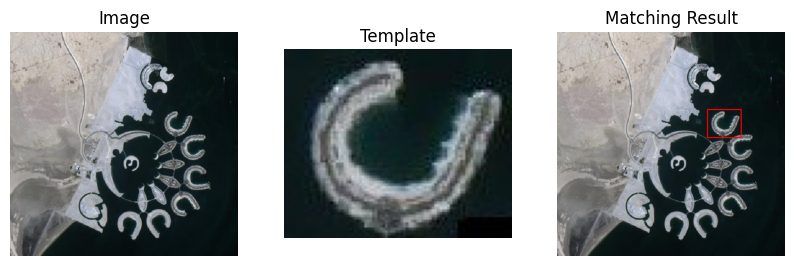

In [5]:
def template_matching(image, template):
    # Convert the images to grayscale
    img_gray = image.convert('L')
    template_gray = template.convert('L')

    # Convert the grayscale images to NumPy arrays
    img_np = np.array(img_gray)
    template_np = np.array(template_gray)

    # Get the dimensions of the template image
    w, h = template_np.shape[::-1]

    # Perform template matching using correlation coefficient
    result = np.zeros_like(img_np, dtype=np.float32)
    for y in range(img_np.shape[0] - h):
        for x in range(img_np.shape[1] - w):
            # Calculate the correlation coefficient
            patch = img_np[y:y+h, x:x+w]
            correlation = np.corrcoef(patch.ravel(), template_np.ravel())[0, 1]
            result[y, x] = correlation

    return result

# Load the image and template
image = Image.open('/content/drive/MyDrive/PCVK/Images/Object Detection/bahrain.jpg')
template = Image.open('/content/drive/MyDrive/PCVK/Images/Object Detection/bahrain-template.jpg')

# Perform template matching
matching_result = template_matching(image, template)

# Find the coordinates of the matched regions
threshold = 0.9  # Adjust the threshold to control the matching sensitivity
y_coords, x_coords = np.where(matching_result >= threshold)

# Draw rectangles around the matched regions
image_with_rectangles = image.copy()
draw = ImageDraw.Draw(image_with_rectangles)
w, h = template.size
for x, y in zip(x_coords, y_coords):
    draw.rectangle([(x, y), (x + w, y + h)], outline='red')

# Display the images
plt.figure(figsize=(10, 8))
plt.subplot(1, 3, 1)
plt.imshow(image)
plt.title('Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(template)
plt.title('Template')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(image_with_rectangles)
plt.title('Matching Result')
plt.axis('off')

plt.show()


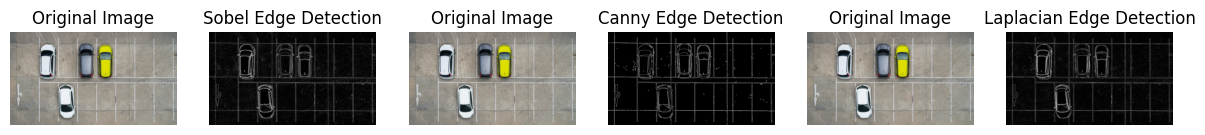

In [6]:
image = cv2.imread('/content/drive/MyDrive/PCVK/Images/Object Detection/car-park.jpg')
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

change_to = cv2.GaussianBlur(gray_image,(3,3),0)
img_sobelx = cv2.Sobel(change_to, cv2.CV_64F, 1, 0, ksize=3)
img_sobely = cv2.Sobel(change_to, cv2.CV_64F, 0, 1, ksize=3)
img_sobelxy = cv2.addWeighted(cv2.convertScaleAbs(img_sobelx), 0.5, cv2.convertScaleAbs(img_sobely), 0.5, 0)


# Apply Canny edge detection
canny = cv2.Canny(gray_image, 100, 200)

# Apply Laplacian edge detection
img = cv2.GaussianBlur(gray_image,(3,3),0)
# Filter the image using filter2D, which has inputs: (grayscale image, bit-depth, kernel)
filtered_image = cv2.Laplacian(img, ksize=3, ddepth=cv2.CV_16S)
# converting back to uint8
filtered_image = cv2.convertScaleAbs(filtered_image)

# Display the images
plt.figure(figsize=(15, 15))

plt.subplot(1, 6, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 6, 2)
plt.imshow(img_sobelxy, cmap='gray')
plt.title('Sobel Edge Detection')
plt.axis('off')

plt.subplot(1, 6, 3)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 6, 4)
plt.imshow(canny, cmap='gray')
plt.title('Canny Edge Detection')
plt.axis('off')

plt.subplot(1, 6, 5)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 6, 6)
plt.imshow(filtered_image, cmap='gray')
plt.title('Laplacian Edge Detection')
plt.axis('off')

plt.show()


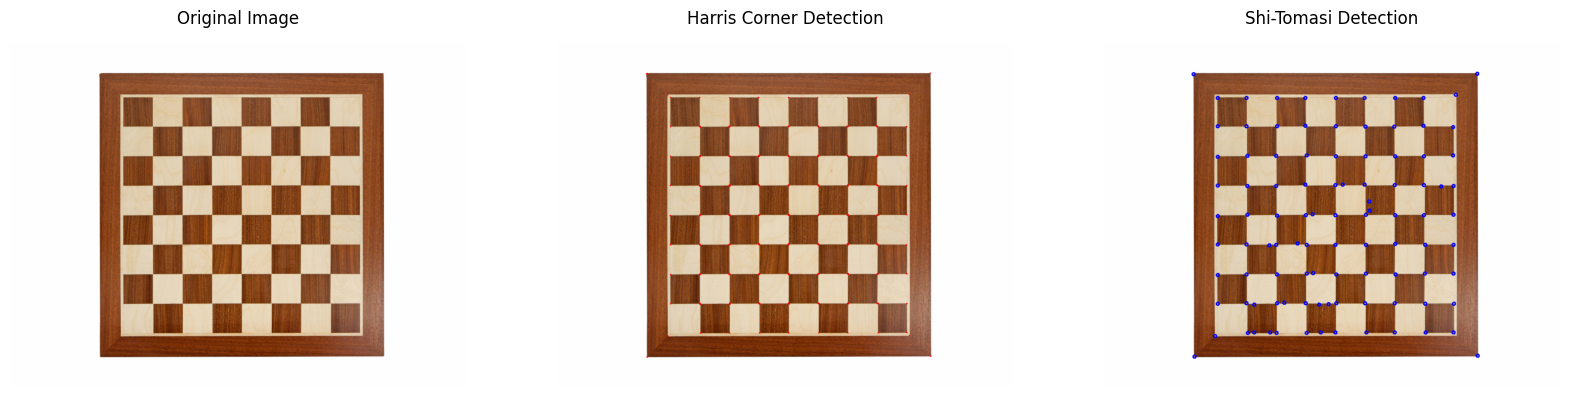

In [14]:
image_5_asli = cv2.imread('/content/drive/MyDrive/PCVK/Images/Object Detection/chess-board.jpg')
image_5_harris = image_5_asli.copy()
image_5_shi_tomasi = image_5_asli.copy()
grey = cv2.cvtColor(image_5_harris,cv2.COLOR_BGR2GRAY)
dst = cv2.cornerHarris(grey,3,1,0.04)

gray_img = np.float32(grey) 
harris_output = cv2.cornerHarris(gray_img,2,3, 3)
harris_output = cv2.dilate(harris_output, None)
image_5_harris[dst>0.01*dst.max()]=[0,0,255]

corners = cv2.goodFeaturesToTrack(gray_img, 100,0.01,10) 
corners = np. int0(corners) 
for i in corners:
    x,y = i.ravel() 
    cv2.circle(image_5_shi_tomasi, (x,y),3,255,2)


fig = plt.figure(figsize=(20, 12))
plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(image_5_asli, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(cv2.cvtColor(image_5_harris, cv2.COLOR_BGR2RGB))
plt.title('Harris Corner Detection')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(image_5_shi_tomasi, cv2.COLOR_BGR2RGB))
plt.title('Shi-Tomasi Detection')
plt.axis('off')


plt.show()

number of Hough lines: 33
Number of filtered lines: 1
Number of filtered lines: 2
Number of filtered lines: 3
Number of filtered lines: 4
Number of filtered lines: 5
Number of filtered lines: 6
Number of filtered lines: 7
Number of filtered lines: 8
Number of filtered lines: 9
Number of filtered lines: 10
Number of filtered lines: 11
Number of filtered lines: 12
Number of filtered lines: 13
Number of filtered lines: 14
Number of filtered lines: 14
Number of filtered lines: 15
Number of filtered lines: 15
Number of filtered lines: 15
Number of filtered lines: 16
Number of filtered lines: 16
Number of filtered lines: 17
Number of filtered lines: 17
Number of filtered lines: 18
Number of filtered lines: 18
Number of filtered lines: 19
Number of filtered lines: 19
Number of filtered lines: 19
Number of filtered lines: 20
Number of filtered lines: 20
Number of filtered lines: 20
Number of filtered lines: 20
Number of filtered lines: 20
Number of filtered lines: 20


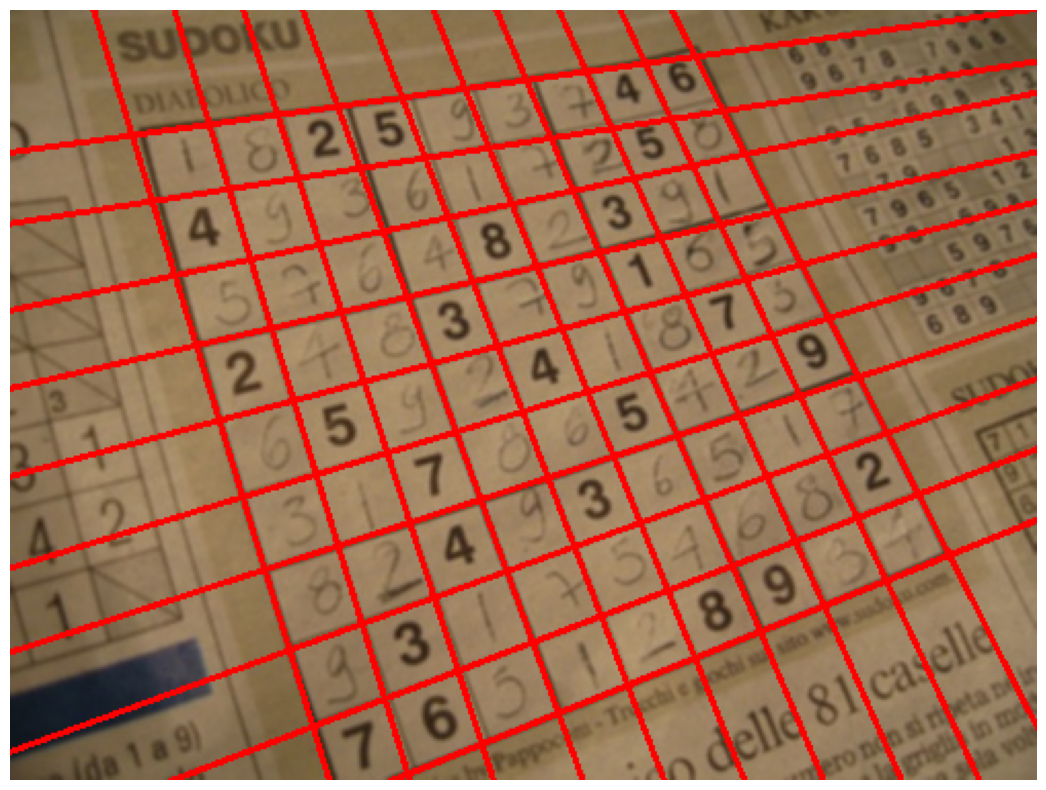

In [17]:
image_6 = cv2.imread('/content/drive/MyDrive/PCVK/Images/Object Detection/sudoku.jpg') 
convert_grey = cv2.cvtColor(image_6, cv2.COLOR_BGR2GRAY)

edges = cv2.Canny (convert_grey, 90, 150, apertureSize = 3)

kernel = np.ones((3,3), np.uint8) 
edges = cv2.dilate(edges,kernel,iterations = 1)

kernel = np.ones((5,5), np.uint8) 
edges = cv2.erode (edges, kernel, iterations = 1)

lines = cv2.HoughLines(edges,1,np.pi/180,150)


if not lines.any():
    print('No lines were found') 
    exit()

if filter:
    rho_threshold = 15 
    theta_threshold = 0.1

 
    similar_lines = {i : [] for i in range(len(lines))} 
    for i in range(len(lines)): 
      for j in range (len (lines)): 
        if i == j: 
            continue

        rho_i, theta_i = lines[i][0] 
        rho_j, theta_j = lines[j][0] 
        if abs(rho_i - rho_j) < rho_threshold and abs (theta_i - theta_j) < theta_threshold:
            similar_lines[i].append(j)


    indices = [i for i in range(len(lines))] 
    indices.sort(key=lambda x: len(similar_lines[x]))

    line_flags = len(lines) *[True] 
    for i in range(len(lines) - 1): 
        if not line_flags [indices[i]]: 
            continue

        for j in range(i + 1, len(lines)): 
            if not line_flags[indices[j]]:
                continue
            rho_i, theta_i = lines[indices[i]][0] 
            rho_j, theta_j = lines[indices[j]][0] 
            if abs(rho_i - rho_j) < rho_threshold and abs(theta_i - theta_j) < theta_threshold:
                line_flags [indices[j]] = False
    print('number of Hough lines:', len(lines))
    
    filtered_lines = []

    if filter:
        for i in range(len(lines)): 
            if line_flags[i]:
                filtered_lines.append(lines[i])

            print('Number of filtered lines:', len(filtered_lines )) 
    else:
        filtered_lines = lines

    for line in filtered_lines:
        rho, theta = line [0] 
        a = np.cos(theta) 
        b = np.sin(theta) 
        x0 = a*rho 
        y0 = b*rho 
        x1 = int(x0 + 1000*(-b)) 
        y1 = int(y0 + 1000*(a)) 
        x2 = int(x0 - 1000*(-b)) 
        y2 = int(y0 - 1000*(a))

        cv2.line(image_6, (x1, y1), (x2,y2),(0,0,255),2)

    plt.figure(figsize=(20,10)) 
    plt.imshow(cv2.cvtColor(image_6, cv2.COLOR_BGR2RGB))
    plt.axis('off')

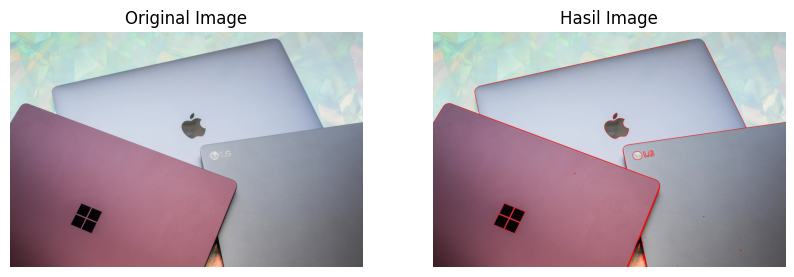

In [22]:
image_real = cv2.imread('/content/drive/MyDrive/PCVK/Images/Object Detection/laptop.jpg')
image_proses = image_real.copy()
img_grey = cv2.cvtColor(image_proses, cv2.COLOR_BGR2GRAY)

edged = cv2.Canny(img_grey, 30, 200)

contours, hierarchy = cv2.findContours(edged, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

cv2.drawContours(image_proses, contours, -1, (0,0,255), 3)

# Display the images
fig = plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image_real, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(image_proses, cv2.COLOR_BGR2RGB))
plt.title('Hasil Image')
plt.axis('off')


plt.show()
